In [1]:
from autosim.car import Car, specs
from helpers import kph_to_mps, mps_to_kph
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Зависимость силы, действующей на автомобиль от управляющего решения
def get_f_from_d(v, ds = np.arange(-1, 1, 0.01)):
    car = Car()
    fs = []
    for d in ds:
        force = car.get_force(d)
        fs.append(force(None, None, v))
    return fs

# Зависимость силы, действующей на автомобиль от управляющего решения
def get_a_from_d(v, ds = np.arange(-1, 1, 0.01)):
    car = Car()
    a = []
    for d in ds:
        force = car.get_force(d)
        a.append(force(None, None, v) / car.mass)
    return a

# График зависимости силы, действующей на автомобиль от управляющего решения
def draw_f_from_d(vs, ds = np.arange(-1, 1, 0.01)):
    for v in vs:
        plt.plot(ds, get_f_from_d(v, ds), label=f"v = {mps_to_kph(v):.0f} km/h")
    plt.title('Зависимость силы от управления при фиксированной скорости')
    plt.legend()
    plt.grid()
    plt.show()

# График зависимости ускорения, действующего на автомобиль от управляющего решения
def draw_a_from_d(vs, ds = np.arange(-1, 1, 0.01)):
    for v in vs:
        plt.plot(ds, get_a_from_d(v, ds), label=f"v = {mps_to_kph(v):.0f} km/h")
    plt.title('Зависимость ускорения от управления при фиксированной скорости')
    plt.legend()
    plt.grid()
    plt.show()

# Зависимость силы, действующей на автомобиль от скорости
def get_f_from_v(d, vs = np.arange(0, 120, 1)):
    car = Car()
    fs = []
    for v in vs:
        force = car.get_force(d)
        fs.append(force(None, None, v))
    return fs

# Зависимость силы, действующей на автомобиль от скорости
def get_a_from_v(d, vs = np.arange(0, 120, 1)):
    car = Car()
    a = []
    for v in vs:
        force = car.get_force(d)
        a.append(force(None, None, v) / car.mass)
    return a

# График зависимости силы, действующей на автомобиль от скорости
def draw_f_from_v(ds, vs = np.arange(0, 120, 1)):
    for d in ds:
        plt.plot(vs, get_f_from_v(d, vs), label=f"d = {d:.2f}")
    plt.title('Зависимость силы от скорости при фиксированном управлении')
    plt.legend()
    plt.grid()
    plt.show()

# График зависимости силы, действующей на автомобиль от скорости
def draw_a_from_v(ds, vs = np.arange(0, 120, 1)):
    for d in ds:
        plt.plot(vs, get_a_from_v(d, vs), label=f"d = {d:.2f}")
    plt.title('Зависимость ускорения от скорости при фиксированном управлении')
    plt.legend()
    plt.grid()
    plt.show()

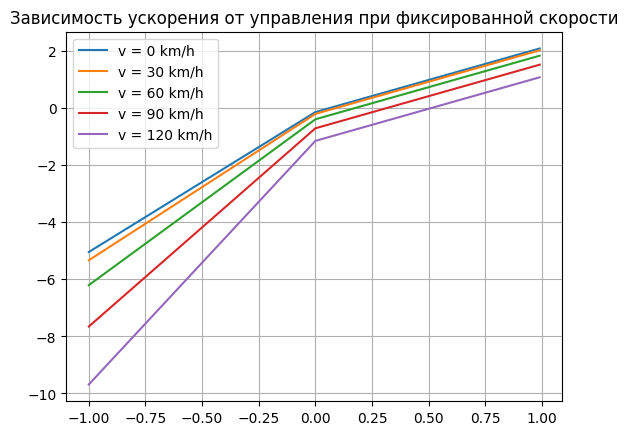

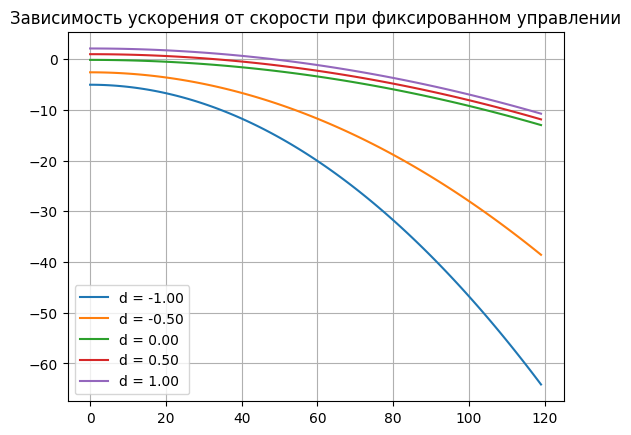

In [3]:
vs_kph = [0, 30, 60, 90, 120]
vs = [kph_to_mps(v) for v in vs_kph]
draw_a_from_d(vs)
ds = [-1, -0.5, 0, 0.5, 1]
draw_a_from_v(ds)

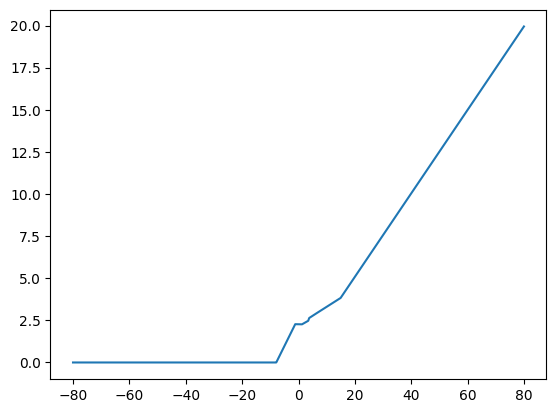

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return x if x > 0 else 0

def make_relu_composition_neuron(inputs):
    weights = np.random.uniform(low=-1, high=1, size=inputs)
    bias = np.random.uniform(low=-1, high=1, size=1)
    return lambda x: relu(np.sum(x * weights + bias[0]))

def make_relu_composition_layer(inputs, outputs):
    layer = [make_relu_composition_neuron(inputs) for _ in range(outputs)]
    return lambda x: np.array([neuron(x) for neuron in layer])

def make_relu_composition(layers: list[int]):
    network = []
    for i in range(len(layers) - 1):
        network += [make_relu_composition_layer(layers[i], layers[i + 1])]
    network += [make_relu_composition_layer(layers[-1], 1)]
    def lambdify(network):
        if len(network) == 1:
            return network[0]
        else:
            return lambda x: lambdify(network[1:])(network[0](x))

    return lambda x: np.sum(lambdify(network)(x))

relus = make_relu_composition([1, 3, 6])
xs = np.arange(-80, 80, 0.1)
ys = [relus(x) for x in xs]

plt.plot(xs, ys)